In [20]:
import pyranges as pr
import seaborn as sns

In [26]:
df = pr.read_gtf('45_EU5_GM12878.isoforms.gtf').df

In [27]:
len(df.transcript_id.unique())

33685

In [28]:
len(df[['transcript_id', 'Strand']].drop_duplicates())

33685

In [11]:
len(df.gene_id.unique())

18269

In [12]:
len(df.drop_duplicates(['Strand', 'gene_id']))

18420

In [14]:
# find genes w/ plus and minus strands
temp = df[['gene_id', 'Strand']].drop_duplicates()
temp = temp.groupby('gene_id').nunique().rename({'Strand':'n_strands'}, axis=1).reset_index()
temp

,gene_id,n_strands
0,ENSG00000000419.14,1
1,ENSG00000000460.17,1
2,ENSG00000000938.13,1
3,ENSG00000001036.14,1
4,ENSG00000001461.18,1
...,...,...
18264,chrX:80675000,1
18265,chrX:81201000,1
18266,chrX:81282000,1
18267,chrX:85003000,1


In [18]:
# number of exons per transcript
temp2 = df[['gene_id', 'transcript_id', 'Feature']]
temp2 = temp2.loc[temp2.Feature=='exon']
temp2 = temp2.groupby(['gene_id', 'transcript_id']).count().rename({'Feature':'n_exons'}, axis=1).reset_index()
temp2.loc[temp2.n_exons==1]

# merge w/ 2 strand or 1 strand gene 
temp2 = temp2.merge(temp, how='left', on='gene_id')

In [25]:
temp2.loc[(temp2.n_exons>1)&(temp2.n_strands==2)]

,gene_id,transcript_id,n_exons,n_strands
16382,ENSG00000179833.4,ENST00000313349.3-0,2,2
22077,ENSG00000259804.2,ENST00000605277.1-0,2,2
23431,ENSG00000290127.2,ENST00000843833.1,2,2
23658,ENSG00000291233.2,ENST00000789183.1,2,2
24905,chr11:57741000,6ce05f4f-6511-4594-b71c-2df99699ff2e:0-0,2,2
24935,chr11:62787000,2b8c9686-3234-4c0e-bbc4-1fca089b579f:0-0,2,2
25397,chr12:47216000,c760ce93-554c-4785-9b05-ad9e3e0fb5f6:0-0,3,2
25527,chr12:66123000,37169dfa-1517-4194-bcff-836932a28dd8:0-0,2,2
27331,chr17:81861000,2f89555c-13db-421a-8e8f-1e4d9c7f14e2:0-0,2,2
27406,chr18:23992000,44c86275-ad1c-4908-94ec-9668042f7b9b:0-0,2,2


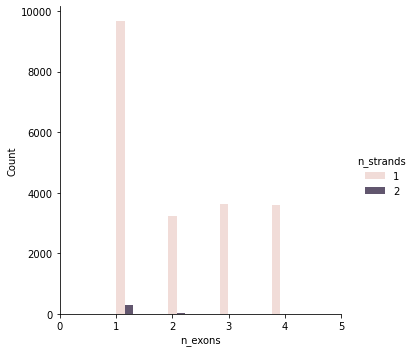

In [22]:
ax = sns.displot(temp2, kind='hist', x='n_exons',
            hue='n_strands', multiple='dodge', edgecolor=None)
ax.set(xlim=(0,5))

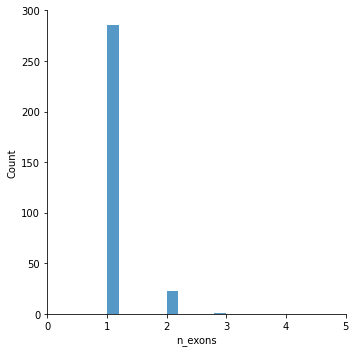

In [23]:
temp3 = temp2.loc[temp2.n_strands==2]
ax = sns.displot(temp3, kind='hist', x='n_exons', edgecolor=None)
ax.set(xlim=(0,5))

In [3]:
df.loc[~df.gene_id.str.contains('ENSG')]

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,exon_number
17,GL000205.2,FLAIR,transcript,59463,60013,.,+,.,GL000205.2:59000,13cfc4f7-f7ae-41c2-bcb5-b53f9aeb69f1:0-0,NaN
18,GL000205.2,FLAIR,exon,59463,60013,.,+,.,GL000205.2:59000,13cfc4f7-f7ae-41c2-bcb5-b53f9aeb69f1:0-0,0
27,GL000205.2,FLAIR,transcript,62654,63864,.,-,.,GL000205.2:62000,c99be2d2-089b-4020-b592-87f0e501eb07:0-0,NaN
28,GL000205.2,FLAIR,exon,62654,63864,.,-,.,GL000205.2:62000,c99be2d2-089b-4020-b592-87f0e501eb07:0-0,0
61,KI270442.1,FLAIR,transcript,385094,386492,.,+,.,KI270442.1:385000,d33706d2-e837-422b-acec-1e1f4f93e981:0-0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
184281,chrX,FLAIR,exon,53192157,53192837,.,-,.,chrX:53192000,3288cf4b-d984-42ff-b9f7-073e3cd153d0:0-0,0
184282,chrX,FLAIR,exon,53224739,53225223,.,-,.,chrX:53192000,3288cf4b-d984-42ff-b9f7-073e3cd153d0:0-0,1
184597,chrX,FLAIR,transcript,101615125,101618000,.,-,.,chrX:101615000,52ea708e-ade4-4c9c-8d2a-ac91a5fc5b54:0-0,NaN
184598,chrX,FLAIR,exon,101615125,101615760,.,-,.,chrX:101615000,52ea708e-ade4-4c9c-8d2a-ac91a5fc5b54:0-0,0


In [4]:
# how to identify novel genes
print(len(df.loc[df.gene_id.str.contains(':')].index))
print(len(df.loc[~df.gene_id.str.contains('ENSG')].index))

19080
19080


In [5]:
print(len(df.loc[~df.gene_id.str.contains('ENSG')].gene_id.unique()))

9021
